<a href="https://colab.research.google.com/github/Hrotich/ML-supervised/blob/main/MORINGA_SCHOOL_INDEPENDENT_PROJECT_WEEK6%2C_HARON_KIPKOECH_ROTICH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUPERVISED MACHINE LEARNING REGRESSION






1.   Defining question

a. Specifying question
 
 Mchezopesa Ltd wants a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.Come up with a model that give this prediction and ranks the countries.

b) Defining the Metric of Success
the metric of success involves  perfomance of:

1.loading of data
2. Data cleaning
3. exploratory analysis
4. Building supervised prediction models
5. making  conclusion

c) Understanding the context
There are two datasets the results csv and the fifa ranking data, the two give information about fifa ranking of all national terams and the confederation and tournaments they take part in.

d) Recording the Experimental Design

The results and outcome from data cleaning and various exploratory analysis are to be  explained.






In [4]:
# importing libabries
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# to load the data set
fifa_df = pd.read_csv("/content/fifa_ranking.csv")

In [686]:
# to preview the top dataa
fifa_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [687]:
# to preview tail
fifa_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [5]:
# to load the results data
res_df = pd.read_csv("/content/results.csv")

In [689]:
# to preview results data
res_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [690]:
# to preview the bottom of the results data
res_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [823]:
fifa_df.shape

(57793, 16)

In [824]:
res_df.shape

(40839, 9)

In [693]:
# to parse datetime
res_df['date'] = pd.to_datetime(res_df['date'])
fifa_df['rank_date'] = pd.to_datetime(fifa_df['rank_date'])

In [694]:
# to create new col year in the fifa ranking
fifa_df['year'] = pd.DatetimeIndex(fifa_df['rank_date']).year

In [695]:
# to create year col in results set
res_df['year'] = pd.DatetimeIndex(res_df['date']).year

In [696]:
#result = fifa_df.merge(rank, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')

In [825]:
# to merge the two dataframes
comb_df = pd.concat([fifa_df, res_df], axis=1, join='inner')
comb_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Data Cleaning


In [826]:
# to check for null values
comb_df.isnull().sum()
#there were no missing values in the combined dataset thus no action  taken for null values

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

In [699]:
# to check for duplicates
comb_df.duplicated()
# there were no duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
40834    False
40835    False
40836    False
40837    False
40838    False
Length: 40839, dtype: bool

In [700]:
# to check on the  combine dataset  entries
comb_df.shape
# there are 40,839 rows and 25 columns in aur combined data set

(40839, 27)

In [701]:
# to check for datatypes
comb_df.dtypes
# every column had correct data type

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
year                                int64
date                       datetime64[ns]
home_team                          object
away_team                          object
home_score                          int64
away_score                          int64
tournament                         object
city                              

In [827]:
# to drop irrelevant columns
comb_df.drop(['country_abrv','rank_change', 'two_year_ago_avg','total_points','cur_year_avg','last_year_avg','three_year_ago_avg','rank_date',], axis='columns', inplace=True)

In [703]:
comb_df.head(2)

,rank,country_full,previous_points,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,confederation,year,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1,Germany,57,0.0,0.0,0.0,0.0,UEFA,1993,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,2,Italy,57,0.0,0.0,0.0,0.0,UEFA,1993,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873


In [830]:
comb_df.to_csv("com_df.csv")

In [10]:
df1= pd.read_csv('/content/com_df.csv')
df1.head()

,Unnamed: 0,rank,country_full,previous_points,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,confederation,year,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year.1
0,0,1,Germany,57,0.0,0.0,0.0,0.0,UEFA,1993,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1,2,Italy,57,0.0,0.0,0.0,0.0,UEFA,1993,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,2,3,Switzerland,50,0.0,0.0,0.0,0.0,UEFA,1993,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,3,4,Sweden,55,0.0,0.0,0.0,0.0,UEFA,1993,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,4,5,Argentina,51,0.0,0.0,0.0,0.0,CONMEBOL,1993,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


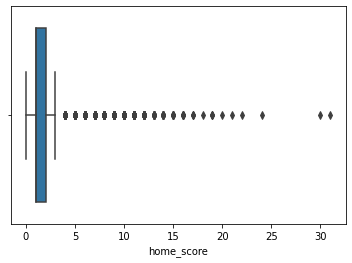

In [706]:
#checking  for outliers in homescore column
sns.boxplot(df1['home_score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


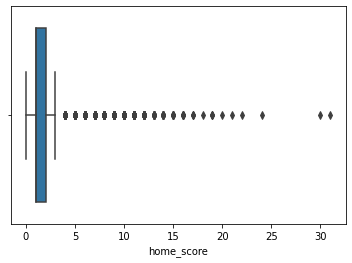

In [707]:
# outlier detection in away score column
sns.boxplot(df1['home_score'])

In [708]:

 #IQR
Q1 = np.percentile(df1[['home_score','away_score']], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1[['home_score','away_score']], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

2.0

Exploratory Data Analysis

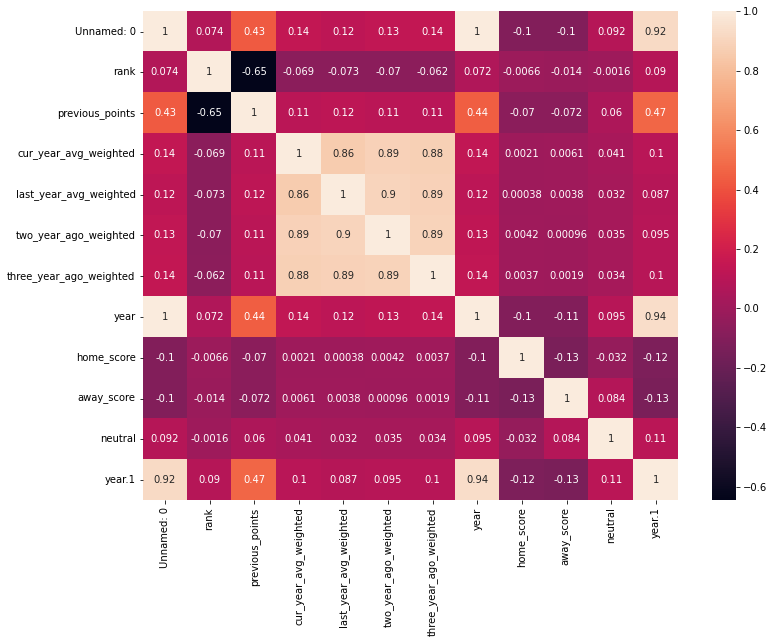

In [745]:
# Bivariate analysis
#
#ploting Heatmap
# heat map
plt.figure(figsize=(12,9))
sns.heatmap(df1.corr(),annot=True)
plt.show()



In [746]:
# 
#
 #Creating our dataframe
frequency_df = pd.DataFrame(df1, columns=['year','country_full', 'previous_points','home_score','away_score'])
frequency_df.head(10)



,year,country_full,previous_points,home_score,away_score
0,1993,Germany,57,0,0
1,1993,Italy,57,4,2
2,1993,Switzerland,50,2,1
3,1993,Sweden,55,2,2
4,1993,Argentina,51,3,0
5,1993,Republic of Ireland,54,4,0
6,1993,Russia,52,1,3
7,1993,Brazil,55,0,2
8,1993,Norway,49,7,2
9,1993,Denmark,51,9,0


In [711]:
# mct
#mean
df1[["home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]].mean()

home_score                 1.745709
away_score                 1.188105
two_year_ago_weighted      0.737413
cur_year_avg_weighted      2.528763
three_year_ago_weighted    0.510536
dtype: float64

In [712]:
#mode
df1[["home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]].mode()

,home_score,away_score,two_year_ago_weighted,cur_year_avg_weighted,three_year_ago_weighted
0,1,0,0.0,0.0,0.0


In [713]:
df1[["home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]].median()

home_score                 1.0
away_score                 1.0
two_year_ago_weighted      0.0
cur_year_avg_weighted      0.0
three_year_ago_weighted    0.0
dtype: float64

In [714]:
# measures of dispersion
# std
df1[["home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]].std()

home_score                  1.749145
away_score                  1.405120
two_year_ago_weighted       9.374193
cur_year_avg_weighted      29.946999
three_year_ago_weighted     6.147067
dtype: float64

In [744]:
#var
df1[["home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]].var()

home_score                   3.059508
away_score                   1.974362
two_year_ago_weighted       87.875490
cur_year_avg_weighted      896.822726
three_year_ago_weighted     37.786439
dtype: float64

In [716]:
#quantile([0.25,0.5,0.75])
df1[["home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]].quantile([0.25,0.5,0.75])


,home_score,away_score,two_year_ago_weighted,cur_year_avg_weighted,three_year_ago_weighted
0.25,1.0,0.0,0.0,0.0,0.0
0.50,1.0,1.0,0.0,0.0,0.0
0.75,2.0,2.0,0.0,0.0,0.0


In [717]:
# skewnes
df1[["home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]].skew()

home_score                  2.201504
away_score                  2.590589
two_year_ago_weighted      15.882537
cur_year_avg_weighted      14.401956
three_year_ago_weighted    15.511318
dtype: float64

In [718]:
#kurtosis
df1[["home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]].kurt()

home_score                  11.714104
away_score                  15.757920
two_year_ago_weighted      295.881220
cur_year_avg_weighted      231.630837
three_year_ago_weighted    291.632215
dtype: float64

In [832]:
df1.shape

(40839, 18)

In [ ]:
#pd.get_dummies(df1, columns=["tournament"]).head()

In [721]:
#to drop tournament col
#df1.drop(['tournament'], axis='columns', inplace=True)

In [833]:
df1.head()

,Unnamed: 0,rank,country_full,previous_points,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,1,Germany,57,0.0,0.0,0.0,0.0,UEFA,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1,2,Italy,57,0.0,0.0,0.0,0.0,UEFA,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,2,3,Switzerland,50,0.0,0.0,0.0,0.0,UEFA,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,3,4,Sweden,55,0.0,0.0,0.0,0.0,UEFA,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,4,5,Argentina,51,0.0,0.0,0.0,0.0,CONMEBOL,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Multivariate analysis

linear discriminant analysis


In [16]:
df2=df1[["rank","home_score", "away_score","two_year_ago_weighted","cur_year_avg_weighted","three_year_ago_weighted"]]

In [17]:
# application of linear discriminant analysis
# assigning variables
X = df2.iloc[:, 0:4].values
y = df2.iloc[:,4].values

In [18]:
 #dividing data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
#  to perform Feature scaling
# 
from sklearn.preprocessing import StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: ignored

In [842]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalys

NameError: ignored

In [788]:
df1.drop(['confederation','confederation','three_year_ago_weighted','country_full','home_team','away_team','date',],axis=1,inplace=True)

In [843]:
# checking for multicolinearity of our variables
# 
 #the independent variables set
X = df1[['previous_points', 'home_score', 'away_score']]
  
# VIF dataframe
vif_df1 = pd.DataFrame()
vif_df1["feature"] = X.columns
  
# calculating VIF for each feature
vif_df1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


           feature       VIF
0  previous_points  1.434979
1       home_score  1.368278
2       away_score  1.294381


In [815]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df1[['previous_points', 'home_score', 'away_score']]
y = df1['rank'].values

X_train, X_test, rank_train, rank_test = train_test_split(X, y, test_size=0.3, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, rank_train)

# This is our prediction for admission based on our model
rank_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(rank_predict, rank_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.3107053594195048

In [738]:
#Barttles test
import scipy as sp

test_result, p_value = sp.stats.bartlett(rank_predict, residuals)

# T
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(probability)
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


1.0
the variances are homogeneous!


In [807]:

#cross validation
# We will use 3 independent variables for this
X = df1[['previous_points', 'home_score', 'away_score']]
y = df1['rank'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 34.09818566701316
Mean Squared Error: 1937.5507769684343
Root Mean Squared Error: 44.01761893797113


In [816]:
#check for accuracy
from sklearn.model_selection import RepeatedKFold
df1= np.array([['previous_points', 'rank'], ['home_score', 'away_score']])
random_state = 0
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(df1):
  print("%s %s" % (train, test))


[0] [1]
[1] [0]
[1] [0]
[0] [1]


polynomial regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [58]:
# splitting data
X = df2_sample.iloc[:, 1:2].values
y = df2_sample.iloc[:, 2].values
print(X)
print(y)

[[3]
 [5]
 [0]
 [1]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]]
[1 0 3 0 1 2 1 0 1 2]


In [61]:
#Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


# Fit Linear Regression model 
reg_line = LinearRegression()
reg_line.fit(X,y)

LinearRegression()

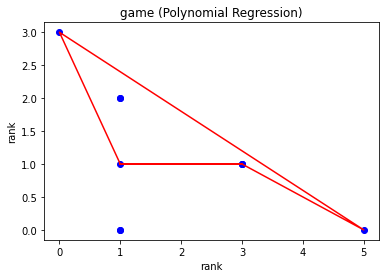

In [64]:
#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('game (Polynomial Regression)')
plt.xlabel('rank')
plt.ylabel('rank')
plt.show()

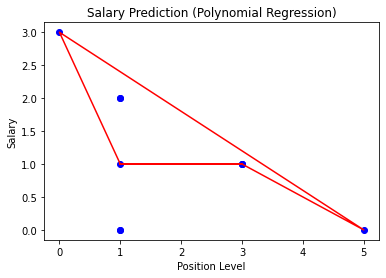

In [71]:
 #Fit polynomial Regression to the dataset
poly_reg_3= PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))

In [73]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_3.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_3.fit_transform(X))

Linear prediction: 0
Polynomial prediction: -5


logistic regression


In [846]:
df1.head()

,Unnamed: 0,rank,country_full,previous_points,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,1,Germany,57,0.0,0.0,0.0,0.0,UEFA,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1,2,Italy,57,0.0,0.0,0.0,0.0,UEFA,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,2,3,Switzerland,50,0.0,0.0,0.0,0.0,UEFA,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,3,4,Sweden,55,0.0,0.0,0.0,0.0,UEFA,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,4,5,Argentina,51,0.0,0.0,0.0,0.0,CONMEBOL,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [847]:
# creating dummy for categorical variables
df2 = pd.get_dummies(df1, columns = ['tournament', 'neutral'])


In [848]:
# to drop col
df1.drop(['neutral', 'confederation','confederation','three_year_ago_weighted','country_full','home_team','away_team','date'],axis=1,inplace=True)

In [22]:
df2.head()

,rank,home_score,away_score,two_year_ago_weighted,cur_year_avg_weighted,three_year_ago_weighted
0,1,0,0,0.0,0.0,0.0
1,2,4,2,0.0,0.0,0.0
2,3,2,1,0.0,0.0,0.0
3,4,2,2,0.0,0.0,0.0
4,5,3,0,0.0,0.0,0.0


In [23]:
# import random 
# Selecting the sample 
df2_sample = df2.sample(n = 10, replace="False")
df2_sample

,rank,home_score,away_score,two_year_ago_weighted,cur_year_avg_weighted,three_year_ago_weighted
5068,166,3,1,0.0,0.0,0.0
14785,86,5,0,0.0,0.0,0.0
22238,13,0,3,0.0,0.0,0.0
40763,178,1,0,0.0,55.9,0.0
14526,30,3,1,0.0,0.0,0.0
3991,178,1,2,0.0,0.0,0.0
20439,50,3,1,0.0,0.0,0.0
19194,29,1,0,0.0,0.0,0.0
39079,149,1,1,0.0,0.0,0.0
19218,53,1,2,0.0,0.0,0.0


In [34]:
#splitting our dataset
#
X = df2_sample.drop("rank",axis=1)
y = df2_sample["rank"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=20)

In [853]:
df2.drop(['country_full'],axis=1,inplace=True)

In [35]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [37]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

In [39]:
# random search
# Performing Data Preprocessing
# 
X = df2_sample.iloc[:, 0:5].values
y = df2_sample.iloc[:, 5].values

In [40]:
 #Performing Data Preprocessing
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
 #Scaling our Data
# 
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [50]:
## Training and Cross Validation
# ---
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=40, random_state=0)

In [51]:
#Training and Cross Validation

# 
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [44]:
## Printing the accuracies returned for five folds 
# ---
#
print(all_accuracies.mean())

1.0


In [46]:
 #specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [4, None],
              "max_features": sp_randint(1, 5),
              "min_samples_split": sp_randint(2, 5),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [47]:
#Instantiating RandomizedSearchCV object 
# 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(classifier, param_dist, cv = 5) 

In [48]:
# Calling the fit method

random_sr.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=300,
                                                    random_state=0),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c51f33250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3c51f33290>})

In [49]:
# parameters that return the highest accuracy
#
best_parameters = random_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 1, 'min_samples_split': 2}


 challenging solution

In [ ]:
#from the outcome of the developed model, much improvement need to be made on:
# more deatail research to be done on how to develope the machine learning model for this prediction